In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import xgboost as xgb

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,f1_score


In [2]:
data = pd.read_csv('./finaldata.csv')

C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_7616\3652323026.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./finaldata.csv')


In [3]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
data.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [5]:
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])

In [6]:
data.count()

UnderwrittenCoverID         1000098
PolicyID                    1000098
TransactionMonth            1000098
IsVATRegistered             1000098
Citizenship                 1000098
LegalType                   1000098
Title                       1000098
Language                    1000098
Bank                        1000098
AccountType                 1000098
MaritalStatus               1000098
Gender                      1000098
Country                     1000098
Province                    1000098
PostalCode                  1000098
MainCrestaZone              1000098
SubCrestaZone               1000098
ItemType                    1000098
mmcode                      1000098
VehicleType                 1000098
RegistrationYear            1000098
make                        1000098
Model                       1000098
Cylinders                   1000098
cubiccapacity               1000098
kilowatts                   1000098
bodytype                    1000098
NumberOfDoors               

In [7]:
data.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors               

In [8]:
# Removing duplicate rows.
print('Duplicate Rows Count : ', data.duplicated().sum())
data=data.drop_duplicates(keep="first")



Duplicate Rows Count :  74


In [9]:
data.drop(columns=['NumberOfVehiclesInFleet'],inplace=True)

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(1000024, 51)

In [12]:
def encoder(method, dataframe, columns_label, columns_onehot):

    if method == 'labelEncoder':

        df_lbl = dataframe.copy()

        for col in columns_label:
            label = LabelEncoder()
            label.fit(list(dataframe[col].values))
            df_lbl[col] = label.transform(df_lbl[col].values)

        return df_lbl

    elif method == 'oneHotEncoder':

        df_oh = dataframe.copy()

        df_oh= pd.get_dummies(data = df_oh, prefix = 'ohe', prefix_sep='_',
                       columns = columns_onehot,
                       drop_first =True,
                       dtype='int8')

        return df_oh



In [13]:
columns_label = ['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
                 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone',
                 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype',
                 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff',
                 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected',
                 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product',
                 'StatutoryClass', 'StatutoryRiskType','IsVATRegistered']

columns_onehot = columns_label

# Encoding
df_label = encoder('labelEncoder', data.copy(), columns_label, columns_onehot)
df_onehot = encoder('oneHotEncoder', data.copy(), columns_label, columns_onehot)

# Display results
print(df_label.head())
print(df_onehot.head())

   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01                1   
1               145249     12827       2015-05-01                1   
2               145249     12827       2015-07-01                1   
3               145255     12827       2015-05-01                1   
4               145255     12827       2015-07-01                1   

   Citizenship  LegalType  Title  Language  Bank  AccountType  ...  \
0            0          0      2         0     2            0  ...   
1            0          0      2         0     2            0  ...   
2            0          0      2         0     2            0  ...   
3            0          0      2         0     2            0  ...   
4            0          0      2         0     2            0  ...   

   ExcessSelected  CoverCategory  CoverType  CoverGroup  Section  Product  \
0              10             26         21           5        1        2   
1   

In [14]:
df_label.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,1,0,0,2,0,2,0,...,10,26,21,5,1,2,0,0,21.929825,0.0
1,145249,12827,2015-05-01,1,0,0,2,0,2,0,...,10,26,21,5,1,2,0,0,21.929825,0.0
2,145249,12827,2015-07-01,1,0,0,2,0,2,0,...,10,26,21,5,1,2,0,0,0.000000,0.0
3,145255,12827,2015-05-01,1,0,0,2,0,2,0,...,1,16,13,5,1,2,0,0,512.848070,0.0
4,145255,12827,2015-07-01,1,0,0,2,0,2,0,...,1,16,13,5,1,2,0,0,0.000000,0.0


In [15]:
df_onehot.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,...,ohe_Third Party Only,ohe_Trailer,ohe_Motor Comprehensive,ohe_Optional Extended Covers,ohe_Standalone passenger liability,"ohe_Third party or third party, fire and theft only",ohe_Mobility Commercial Cover: Monthly,ohe_Mobility Metered Taxis: Monthly,ohe_Standalone Passenger Liability,ohe_True
0,145249,12827,2015-03-01,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,...,0,0,1,0,0,0,0,1,0,1
1,145249,12827,2015-05-01,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,...,0,0,1,0,0,0,0,1,0,1
2,145249,12827,2015-07-01,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,...,0,0,1,0,0,0,0,1,0,1
3,145255,12827,2015-05-01,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,...,0,0,1,0,0,0,0,1,0,1
4,145255,12827,2015-07-01,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,...,0,0,1,0,0,0,0,1,0,1


In [18]:
# Define the scaler function
def scaler(method, data, columns_scaler):
    if method == 'standardScaler':
        standard = StandardScaler()
        df_standard = data.copy()
        df_standard[columns_scaler] = standard.fit_transform(df_standard[columns_scaler])
        return df_standard

    elif method == 'minMaxScaler':
        min_max = MinMaxScaler()
        df_minmax = data.copy()
        df_minmax[columns_scaler] = min_max.fit_transform(df_minmax[columns_scaler])
        return df_minmax

    elif method == 'npLog':
        df_nplog = data.copy()
        df_nplog[columns_scaler] = np.log(df_nplog[columns_scaler])
        return df_nplog

    elif method == 'default':
        return data

# Assuming 'df_label' is your encoded dataset
data = df_label.copy()

# Extract datetime features from 'TransactionMonth'
data['TransactionYear'] = data['TransactionMonth'].dt.year
data['TransactionMonthNum'] = data['TransactionMonth'].dt.month
data['TransactionDay'] = data['TransactionMonth'].dt.day
data['TransactionDayOfWeek'] = data['TransactionMonth'].dt.dayofweek

# Drop the original TransactionMonth column
data = data.drop(columns=['TransactionMonth'])

# Drop the 'VehicleIntroDate' column or transform it properly if it's required for your model
# For now, we'll drop it to avoid complications.
data = data.drop(columns=['VehicleIntroDate'])

# Define the columns to scale
columns_scaler = ['PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders',
                  'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'SumInsured', 'CalculatedPremiumPerTerm',
                  'TotalPremium', 'TotalClaims', 'TransactionYear', 'TransactionMonthNum',
                  'TransactionDay', 'TransactionDayOfWeek']

# Filter out columns that are not numeric
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
data = data.drop(columns=non_numeric_cols)

# Ensure remaining columns are numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Choose the scaling method
method = 'minMaxScaler'

# Apply the scaler
df_scaler = scaler(method, data, columns_scaler)




In [19]:
df_scaler.head()

,UnderwrittenCoverID,PolicyID,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,...,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,TransactionYear,TransactionMonthNum,TransactionDay,TransactionDayOfWeek
0,145249,12827,1,0,0,2,0,2,0,1,...,1,2,0,0,0.012177,0.029629,1.0,0.181818,0.0,1.000000
1,145249,12827,1,0,0,2,0,2,0,1,...,1,2,0,0,0.012177,0.029629,1.0,0.363636,0.0,0.666667
2,145249,12827,1,0,0,2,0,2,0,1,...,1,2,0,0,0.011846,0.029629,1.0,0.545455,0.0,0.333333
3,145255,12827,1,0,0,2,0,2,0,1,...,1,2,0,0,0.019608,0.029629,1.0,0.363636,0.0,0.666667
4,145255,12827,1,0,0,2,0,2,0,1,...,1,2,0,0,0.011846,0.029629,1.0,0.545455,0.0,0.333333


In [20]:
# Prepare the data for training
X = df_scaler.drop(columns=['TotalClaims'])  # Assuming 'TotalClaims' is the target variable
y = df_scaler['TotalClaims']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [21]:
%%time
# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

CPU times: total: 13.7 s
Wall time: 24.1 s


LinearRegression()

In [22]:
%%time
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

CPU times: total: 17 s
Wall time: 19.6 s


DecisionTreeRegressor(random_state=42)

In [23]:
%%time
# Random Forest
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)


CPU times: total: 20min 15s
Wall time: 20min 37s


RandomForestRegressor(random_state=42)

In [24]:
%%time
# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

CPU times: total: 50.2 s
Wall time: 25.6 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [25]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Evaluation metrics for :{}".format(model.__class__.__name__))
    print(f"\t Mean Absolute Error: {mae}")
    print(f"\t Mean Squared Error: {mse}")
    print(f"\t R-squared Score: {r2}")
    return mae,mse,r2,y_pred



Evaluation metrics for :LinearRegression
	 Mean Absolute Error: 0.00038562557928283373
	 Mean Squared Error: 3.459521377894293e-05
	 R-squared Score: 0.019724409532240084
Evaluation metrics for :DecisionTreeRegressor
	 Mean Absolute Error: 0.00035913453881040476
	 Mean Squared Error: 7.884697850192846e-05
	 R-squared Score: -1.234175192599095
Evaluation metrics for :RandomForestRegressor
	 Mean Absolute Error: 0.00036191805725483496
	 Mean Squared Error: 4.411374035599469e-05
	 R-squared Score: -0.2499886010687189
Evaluation metrics for :XGBRegressor
	 Mean Absolute Error: 0.00037823255091013256
	 Mean Squared Error: 4.2191226396480295e-05
	 R-squared Score: -0.19551304503117906


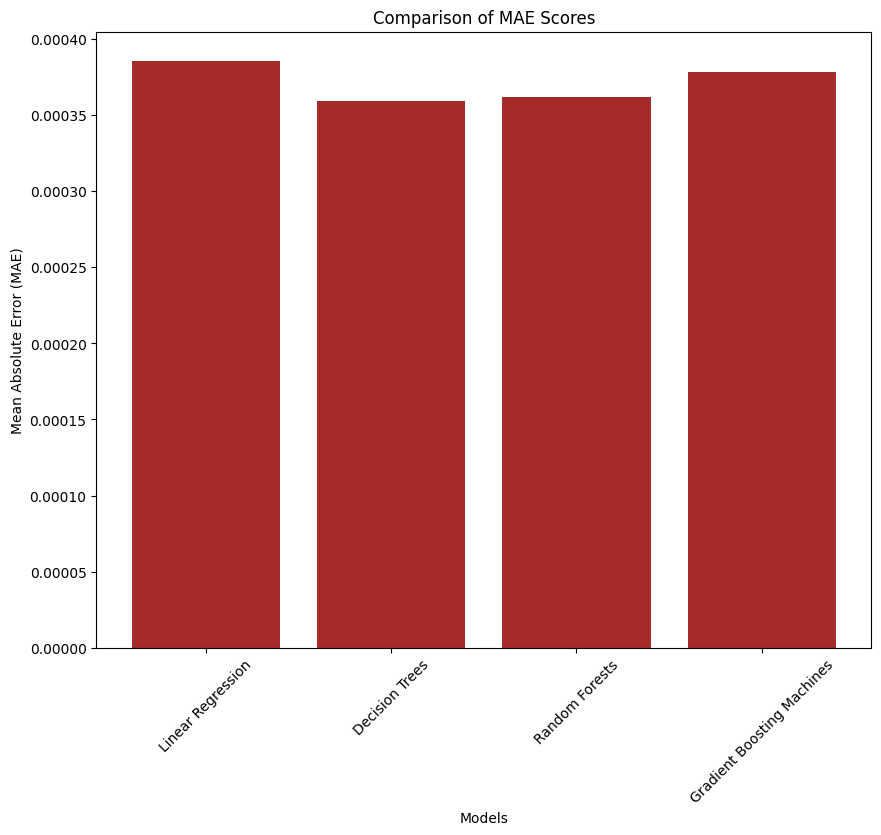

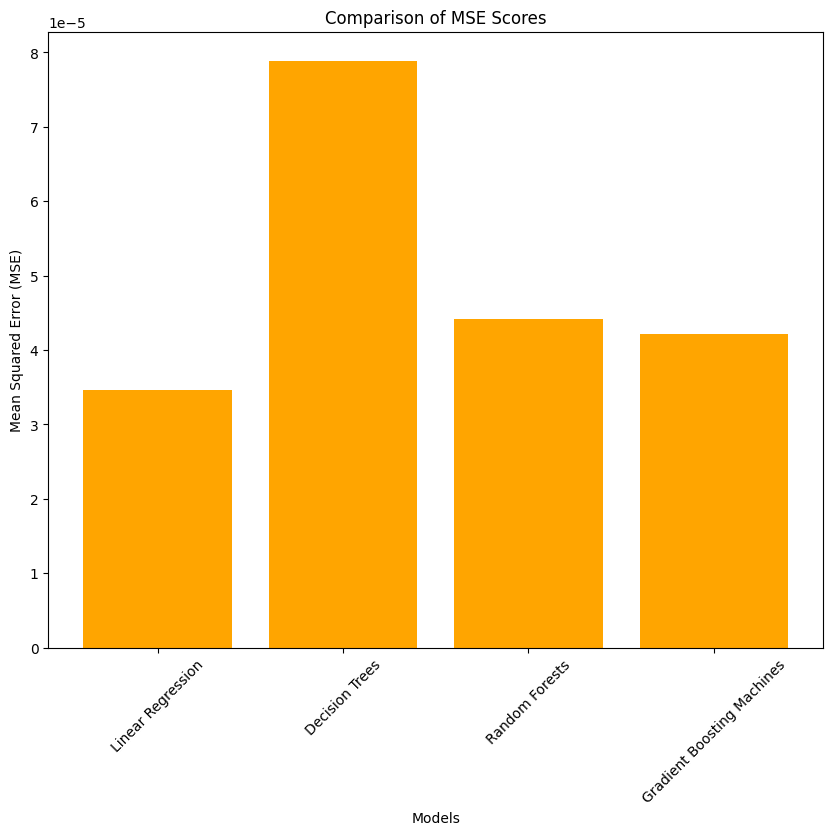

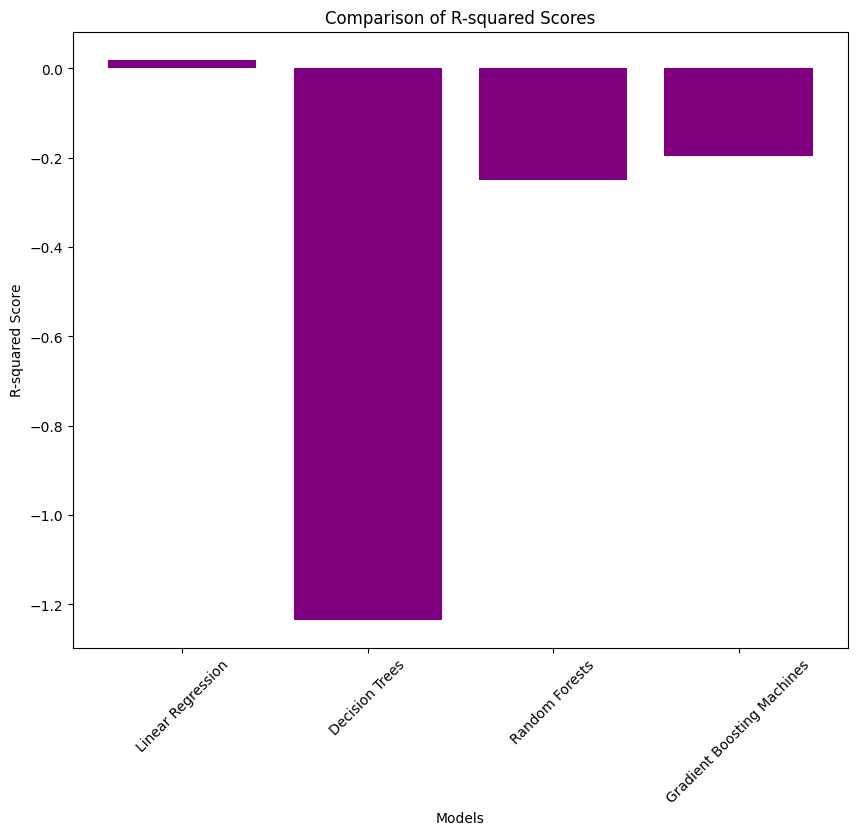

In [26]:
# Initialize lists to store evaluation metrics for each model
models = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Gradient Boosting Machines']
mae_scores = []
mse_scores = []
r2_scores = []
y_predic = []

# Evaluate each model
for model in [lr_model, dt_model, rfr_model, xgb_model]:
    mae, mse, r2,yp = evaluate_model(model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    y_predic.append(yp)

# Plot MAE scores
plt.figure(figsize=(10, 8))
plt.bar(models, mae_scores, color='brown')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE Scores')
plt.xticks(rotation=45)
plt.show()

# Plot MSE scores
plt.figure(figsize=(10, 8))
plt.bar(models, mse_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE Scores')
plt.xticks(rotation=45)
plt.show()

# Plot R-squared scores
plt.figure(figsize=(10, 8))
plt.bar(models, r2_scores, color='purple')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores')
plt.xticks(rotation=45)
plt.show()

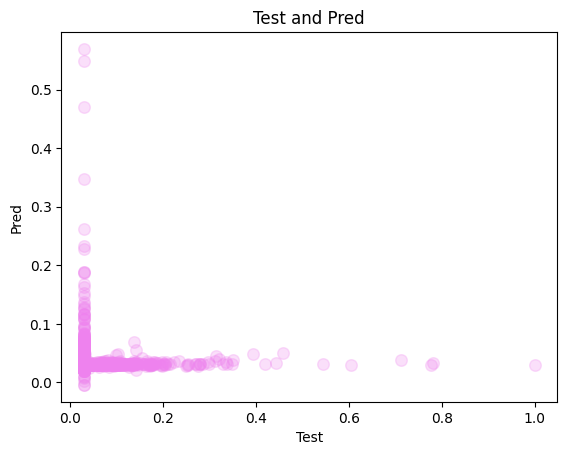

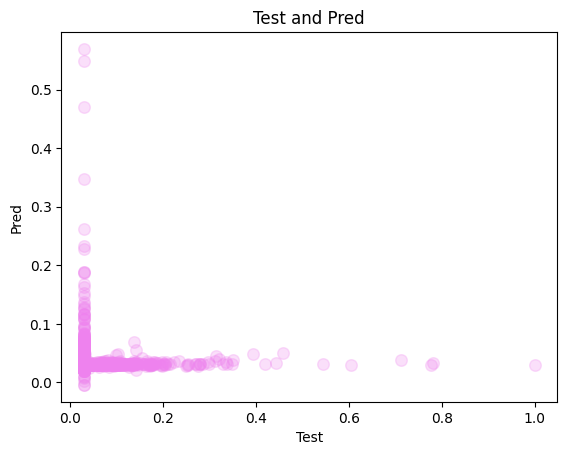

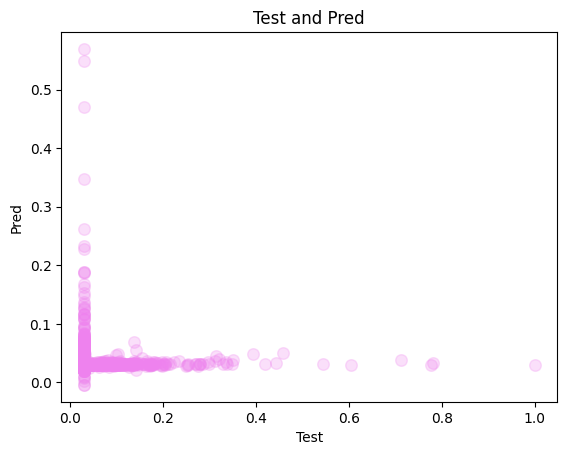

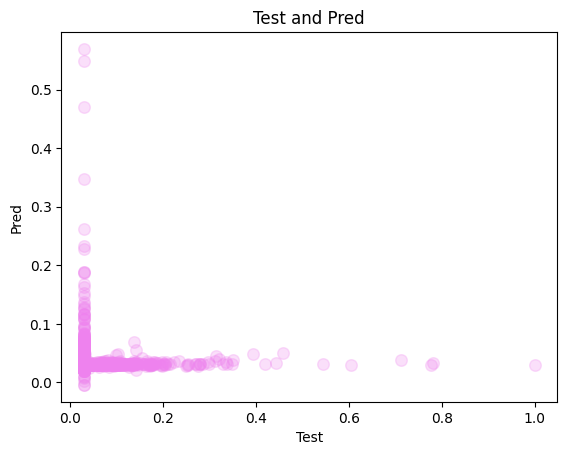

In [27]:
for y_p in y_predic:
    plt.scatter(x = y_test, y = yp, color = 'violet', marker = 'o', s = 70, alpha = 0.25,
            label = 'Test data')
    plt.title('Test and Pred')
    plt.xlabel('Test')
    plt.ylabel('Pred')
    plt.show()

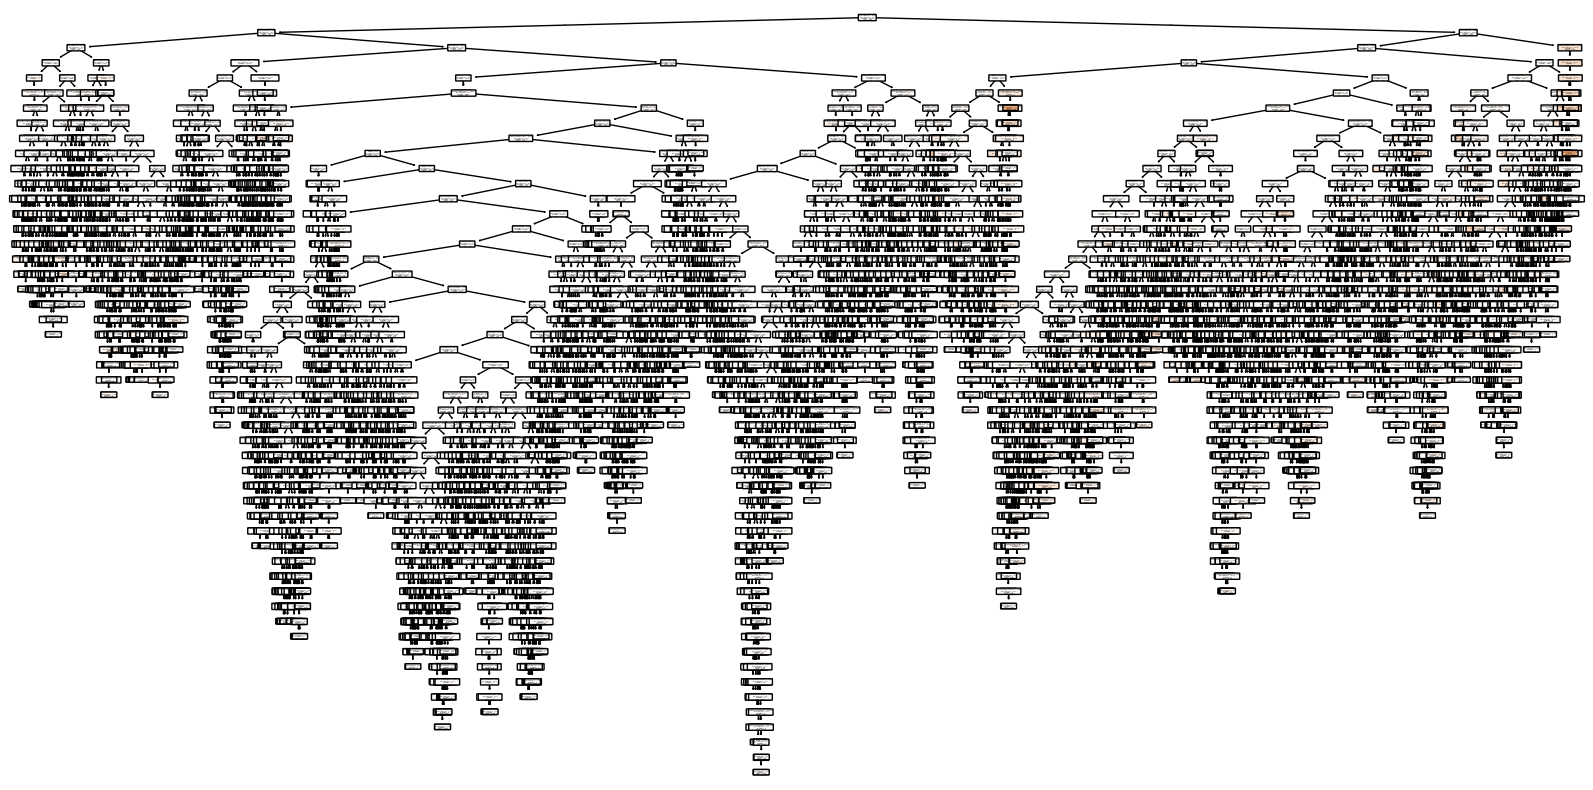

In [28]:
# Extract a single decision tree from the Random Forest
tree_index = 0  # Choose the index of the tree you want to visualize
#single_tree = dt_model.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree= dt_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

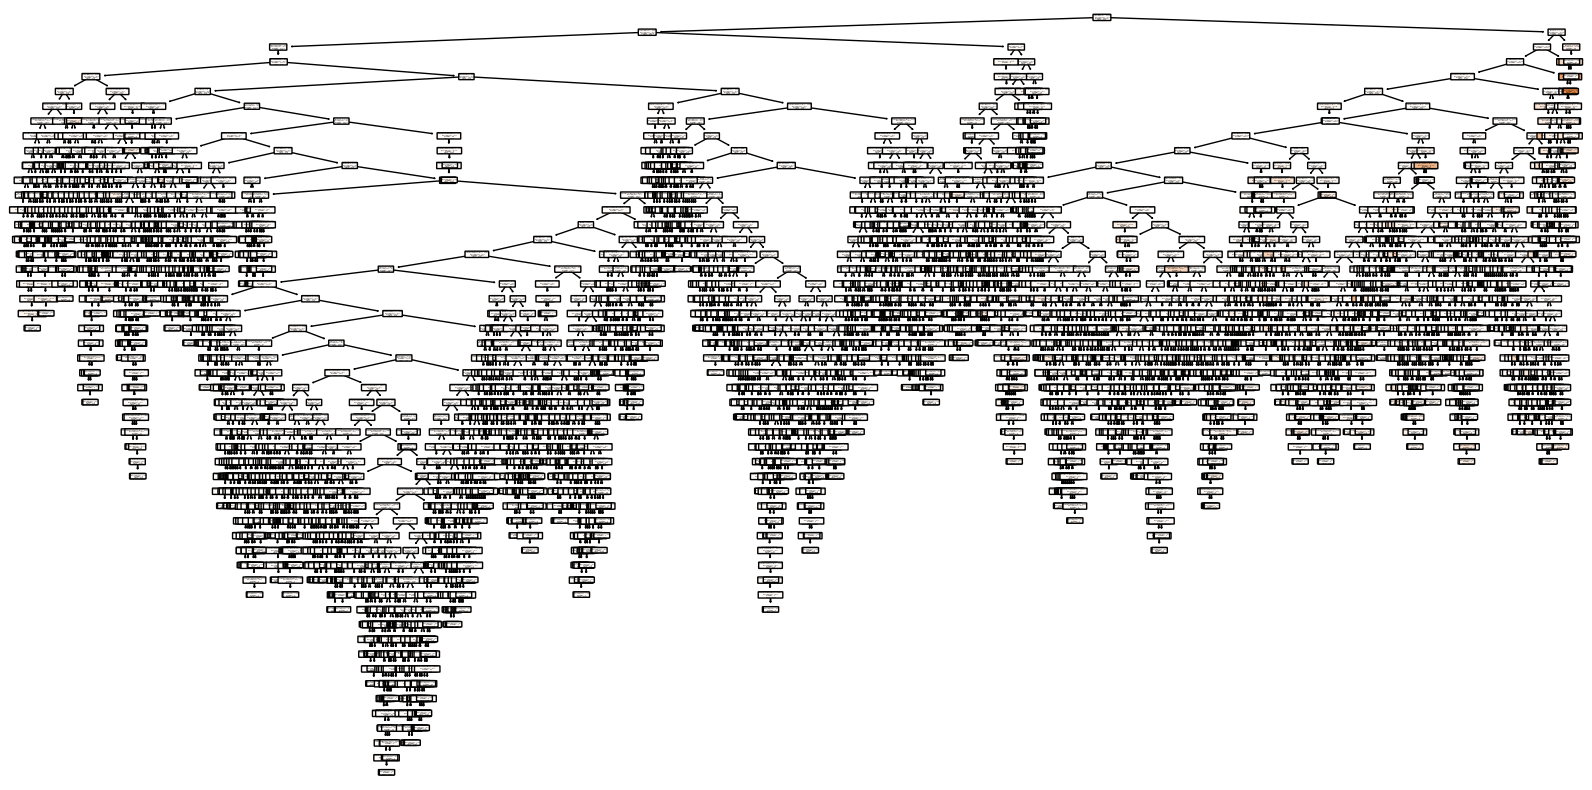

In [29]:

# Extract a single decision tree from the Random Forest
tree_index = 3  # Choose the index of the tree you want to visualize
single_tree = rfr_model.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

In [30]:
# Function to plot feature importance
def plot_feature_importance(model, feature_names, task):
    #feature_importance = model.feature_importances_
    feature_importance = pd.DataFrame(model.feature_importances_, index = feature_names).sort_values(0, ascending=False)

    plt.figure(figsize=(6, 4))

    feature_importance.plot(kind='barh')

    #plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    #plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance Analysis for {task}')
    plt.show()

<Figure size 600x400 with 0 Axes>

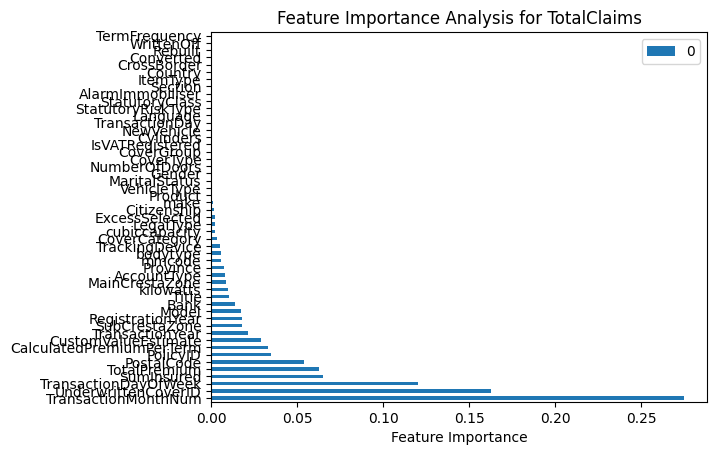

In [31]:
# Plot feature importance for Decision Tree model
plot_feature_importance(dt_model, X_train.columns, "TotalClaims")

<Figure size 600x400 with 0 Axes>

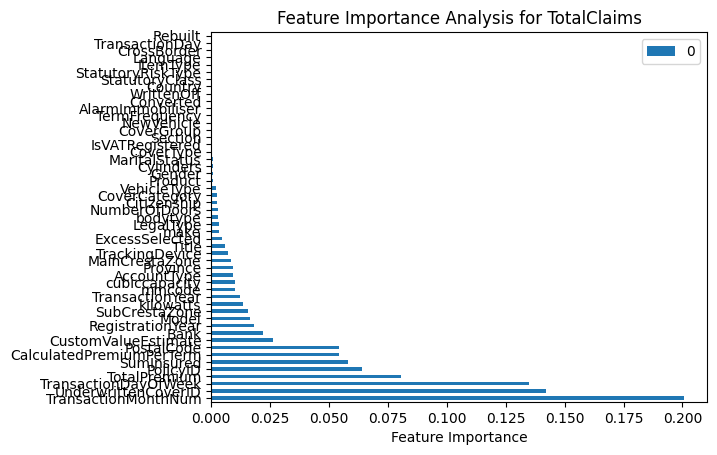

In [32]:
# Plot feature importance for Random Forest models
plot_feature_importance(rfr_model, X_train.columns, "TotalClaims")

<Figure size 600x400 with 0 Axes>

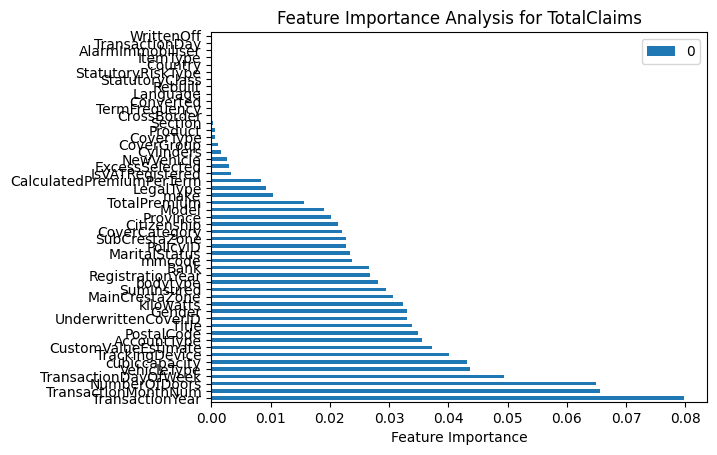

In [33]:
# Plot feature importance for Gradient Boosting Machines (GBMs) models
plot_feature_importance(xgb_model, X_train.columns, "TotalClaims")

In [34]:
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

# Initialize randomized search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=4,       # Cross-validation folds
    n_jobs=-1,  # Use all available cores
    verbose=2,
    scoring='r2'  # Use R-squared for evaluation
)

# Fit the randomized search to your data
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


c:\Users\Abdulaziz\Desktop\10 Academy\AlphaCare Insurance Solutions\week3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
37 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Abdulaziz\Desktop\10 Academy\AlphaCare Insurance Solutions\week3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Abdulaziz\Desktop\10 Academy\AlphaCare Insurance Solutions\week3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   scoring='r2', verbose=2)

In [36]:
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_rf_model = random_search.best_estimator_
r2_score = best_rf_model.score(X_test, y_test)
print("R-squared score on test data:", r2_score)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
R-squared score on test data: -0.07180963146057051


In [37]:
y_pred = rfr_model_hpt.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



NameError: name 'rfr_model_hpt' is not defined

In [ ]:
print(mae)
print(mse)
print(r2)

In [38]:
from sklearn.tree import plot_tree

# Extract a single decision tree from the Random Forest
tree_index = 0  # Choose the index of the tree you want to visualize
single_tree = rfr_model_hpt.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

NameError: name 'rfr_model_hpt' is not defined